In [0]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# import features and labels
import h5py
import numpy as np
from keras.utils import to_categorical
features_path='/content/gdrive/My Drive/ECE1512/features.npy'
labels_path='/content/gdrive/My Drive/ECE1512/Flower102_label.npy'

features = np.load(features_path)
labels   = np.load(labels_path)

label_=labels-1

np.unique(label_)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101], dtype=uint8)

In [0]:
labels_encoded = to_categorical(label_)

In [0]:
features.shape

(8189, 2048)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

In [0]:
from keras.models import Sequential
from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Activation, Dropout, Flatten, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
def build_model(Neuron=500):
    model = Sequential()
    model.add(Dense(units=Neuron, activation='tanh', input_dim=2048))
    model.add(Dense(units=102, activation='softmax'))
    AdamOpt=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=AdamOpt, metrics=['accuracy'])
    return model


In [0]:
model=build_model(Neuron=350)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300)


Train on 6551 samples, validate on 1638 samples
Epoch 1/300
6551/6551 [==============================] - 4s 612us/step - loss: 3.6421 - acc: 0.2841 - val_loss: 2.7146 - val_acc: 0.4402
Epoch 2/300
6551/6551 [==============================] - 3s 433us/step - loss: 2.1833 - acc: 0.5207 - val_loss: 1.9932 - val_acc: 0.5556
Epoch 3/300
6551/6551 [==============================] - 3s 446us/step - loss: 1.9597 - acc: 0.5677 - val_loss: 2.1102 - val_acc: 0.5562
Epoch 4/300
6551/6551 [==============================] - 3s 442us/step - loss: 1.9032 - acc: 0.5944 - val_loss: 2.3196 - val_acc: 0.5092
Epoch 5/300
6551/6551 [==============================] - 3s 425us/step - loss: 2.1033 - acc: 0.5993 - val_loss: 2.5616 - val_acc: 0.5702
Epoch 6/300
6551/6551 [==============================] - 3s 406us/step - loss: 2.1910 - acc: 0.6101 - val_loss: 3.0935 - val_acc: 0.5214
Epoch 7/300
6551/6551 [==============================] - 3s 427us/step - loss: 2.3487 - acc: 0.6042 - val_loss: 2.6545 - val_acc: 

KeyboardInterrupt: ignored

In [0]:
def build_model_1():
    model = Sequential()
    #model.add(Dense(units=Neuron, activation='tanh', input_dim=2048))
    model.add(Dense(units=102, activation='softmax',input_dim=2048))
    AdamOpt=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=AdamOpt, metrics=['accuracy'])
    return model

In [0]:
model=build_model_1()
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Train on 6551 samples, validate on 1638 samples
Epoch 1/50
6551/6551 [==============================] - 2s 340us/step - loss: 3.9079 - acc: 0.1749 - val_loss: 2.9467 - val_acc: 0.3620
Epoch 2/50
6551/6551 [==============================] - 1s 165us/step - loss: 2.3007 - acc: 0.5407 - val_loss: 1.9315 - val_acc: 0.6361
Epoch 3/50
6551/6551 [==============================] - 1s 160us/step - loss: 1.5184 - acc: 0.7443 - val_loss: 1.4100 - val_acc: 0.7558
Epoch 4/50
6551/6551 [==============================] - 1s 162us/step - loss: 1.0992 - acc: 0.8390 - val_loss: 1.1056 - val_acc: 0.8168
Epoch 5/50
6551/6551 [==============================] - 1s 162us/step - loss: 0.8466 - acc: 0.8835 - val_loss: 0.9237 - val_acc: 0.8394
Epoch 6/50
6551/6551 [==============================] - 1s 162us/step - loss: 0.6813 - acc: 0.9138 - val_loss: 0.7892 - val_acc: 0.8596
Epoch 7/50
6551/6551 [==============================] - 1s 162us/step - loss: 0.5649 - acc: 0.9350 - val_loss: 0.6992 - val_acc: 0.8761


In [0]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

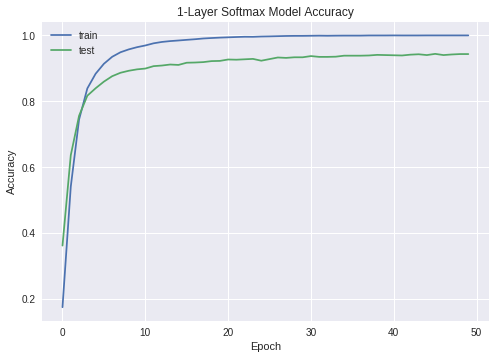

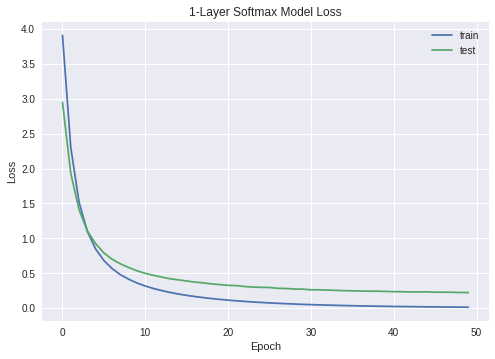

In [0]:
import matplotlib.pyplot as plt
import numpy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('1-Layer Softmax Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('1-Layer Softmax Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
import numpy
import pandas
pandas.DataFrame(hist.history).to_csv("history.csv")

NameError: ignored

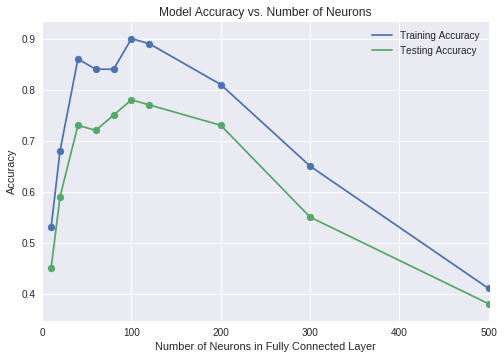

In [14]:
# Data rattrived from "history.csv"
epochs=[10,20,40,60,80,100,120,200,300,500]
acc_tr=[0.53,0.68,0.86,0.84,0.84,0.9,0.89,0.81,0.65,0.41]
acc_test=[0.45,0.59,0.73,0.72,0.75,0.78,0.77,0.73,0.55,0.38]
import matplotlib.pyplot as plt
plt.plot(epochs,acc_tr,label='Training Accuracy')
plt.scatter(epochs,acc_tr)
plt.plot(epochs,acc_test,label='Testing Accuracy')
plt.scatter(epochs,acc_test)
plt.legend()
plt.xlim(0,500)
plt.title("Model Accuracy vs. Number of Neurons")
plt.ylabel('Accuracy')
plt.xlabel('Number of Neurons in Fully Connected Layer')
plt.show()

FileNotFoundError: ignored